# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 2. Классификация изображений. Сверточные нейронные сети.

### Общая информация

Дата выдачи: 07.11.2021

Мягкий дедлайн: 23:59MSK 05.12.2021

Жесткий дедлайн: 23:59MSK 05.12.2021

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{penalty} = M_{full} \cdot 0.85^{t/1440}$, где $M_{full}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать перед самым жестким дедлайном, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=0).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

## Задание 1. (Максимум 10 баллов + 5 бонусных баллов)

__Необходимо выполнить любое из двух заданий (на выбор)__

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 

Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете. 

Ваш код обязательно должен проходить все `assert`'ы ниже.

Необходимо написать функции `train_one_epoch`, `train` и `predict` по шаблонам ниже (во многом повторяют примеры с семинаров). Обратите особое внимание на функцию `predict`: она должна возвращать список лоссов по всем объектам даталоадера, список предсказанных классов для каждого объекта из даталоалера и список настоящих классов для каждого объекта в даталоадере (и именно в таком порядке).

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам. Если вы выполнили оба задания, то берется максимум из двух оценок.

__Бонус__. Вы получаете 5 бонусных баллов если справляетесь с обоими заданиями на 10 баллов (итого 15 баллов). В противном случае выставляется максимальная из двух оценок и ваш бонус равен нулю.

__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 45 минут обучения.
 
Good luck & have fun! :)

In [2]:
import numpy as np
import torch
import torchvision
from tqdm import tqdm
from torch import nn
from torch.nn import functional as F
from sklearn.metrics import accuracy_score
import random
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as T
import time
from IPython.display import clear_output, display
from torchvision.models import resnet18

# You may add any imports you need

In [1]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2021-12-29 20:22:30--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2021-12-29 20:22:30--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc57775e015d4bb712c1e962cc8b.dl.dropboxusercontent.com/cd/0/get/BczUNyWprstySuliNNuSAmNG-I9IDgz64WqruuQdFxvqXET6fTh-FvOOZ0xCig09JI2sJoQ2daVeHaZ7I83Dvg3xMDdlf5YnT70RO7Y_Q-PrJP_VqnM5tKA6dYaH9tNOg_5r7gnu2DrSib_aujn2Pq0S/file?dl=1# [following]
--2021-12-29 20:22:31--  https://uc57775e015d4bb712c1e962cc8b.dl.dropboxusercontent.com/cd/0/get/BczUNyWprstySuliNNuSAmNG-I9IDgz64WqruuQdFxvqXET6fTh-FvOOZ0xCig09JI2sJoQ2daVeHaZ7I83Dvg3xMDd

### Подготовка данных

In [3]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, transform):
        # YOUR CODE
        pass
    
    def __getitem__(self, idx):
        # YOUR CODE
        pass
    
    def __len__(self):
        return self.len


In [4]:
# constants
SEED = 777
LR = 1e-3
BATCH_SIZE = 32
WEIGHT_DECAY = 1e-3
GAMMA = 0.9995

In [5]:
# с прошлой дз
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)
set_random_seed(SEED)

In [6]:
# воспользовался семинаром https://github.com/isadrtdinov/intro-to-dl-hse/blob/main/seminars/193/seminar-02-03-convnets.ipynb

train_transform = T.Compose([
    T.RandomHorizontalFlip(),
    T.ToTensor(),
    T.Normalize((0.5, 0.5, 0.5), (0.2, 0.2, 0.2)),

])

val_transform = T.Compose([
            T.ToTensor(),
            T.Normalize((0.5, 0.5, 0.5), (0.2, 0.2, 0.2)),
])
# YOU CAN DEFINE AUGMENTATIONS HERE

train_dataset = ImageFolder("./dataset/dataset/train", transform=train_transform)
val_dataset = ImageFolder("./dataset/dataset/val", transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET
# OR USE torchvision.datasets.ImageFolder INSTEAD OF MyDataset

train_dataloader = DataLoader(train_dataset, batch_size = BATCH_SIZE, pin_memory = True, num_workers = 4, shuffle = True)
val_dataloader = DataLoader(val_dataset, batch_size = BATCH_SIZE, pin_memory = True, num_workers = 4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [7]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Вспомогательные функции, реализация модели

In [8]:
# воспользовался семинаром https://github.com/isadrtdinov/intro-to-dl-hse/blob/main/seminars/193/seminar-02-03-convnets.ipynb

def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.grid()
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [9]:
# воспользовался семинаром https://github.com/isadrtdinov/intro-to-dl-hse/blob/main/seminars/193/seminar-02-03-convnets.ipynb
def train_one_epoch(model, train_dataloader, criterion, optimizer, device="cuda:0"):
    model.train()
    running_loss, running_accuracy = 0.0, 0.0

    for images, labels in tqdm(train_dataloader, desc='Training'):
        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device)
        
        logits = model(images)
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * images.shape[0]
        running_accuracy += (logits.argmax(dim=-1) == labels).sum().item()
        
    return running_loss / len(train_dataloader.dataset), running_accuracy / len(train_dataloader.dataset)



def predict(model, val_dataloder, criterion, device="cuda:0"):
    model.eval()
    losses = []
    predicted_classes = []
    true_classes = []

    running_loss, running_accuracy = 0.0, 0.0
    for images, labels in tqdm(val_dataloder, desc='Testing'):
        images = images.to(device)
        labels = labels.to(device)
        
        with torch.no_grad():
            logits = model(images)
            loss = criterion(logits, labels)
        
        running_loss += loss.item() * images.shape[0]
        running_accuracy += (logits.argmax(dim=-1) == labels).sum().item()

        predicted_classes += [logits.argmax(dim=-1)]

        losses += [running_loss / len(val_dataloder.dataset)]
        true_classes += [labels]
    
    return np.mean(losses), torch.cat(predicted_classes), torch.cat(true_classes)


def train(model, train_dataloader, val_dataloader, criterion, optimizer, device="cuda:0", n_epochs=10, scheduler=None):
    model.to(device)
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    for epoch in range(n_epochs):
        train_loss, train_accuracy = train_one_epoch(model, train_dataloader, criterion, optimizer, device)
        all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
        train_losses += [train_loss]
        test_losses += [all_losses]
        train_accuracies += [train_accuracy]
        test_accuracies += [accuracy_score(true_labels.cpu(), predicted_labels.cpu())]

        plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)
    print(max(test_accuracies))

### Обучение модели, запуски экспериментов

In [14]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
model = resnet18(pretrained=False).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
criterion = nn.CrossEntropyLoss()
scheduler =  None
n_epochs = 10

Простой тест на проверку правильности написанного кода

In [15]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(predicted_labels.cpu(), true_labels.cpu())
print("tests passed")

Testing:   0%|          | 0/313 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Testing: 100%|██████████| 313/313 [00:08<00:00, 35.22it/s]

tests passed


Запустить обучение можно в ячейке ниже.

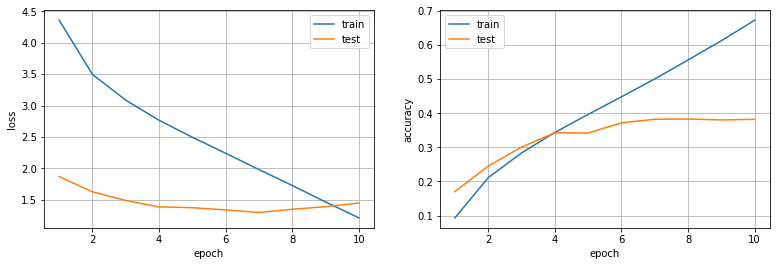

0.3828


In [16]:
train(model, train_dataloader, val_dataloader, criterion, optimizer, device, n_epochs, scheduler)

### Проверка полученной accuracy

После всех экспериментов которые вы проделали, выберите лучшую из своих моделей, реализуйте и запустите функцию `evaluate`. Эта функция должна брать на вход модель и даталоадер с валидационными данными и возврашать accuracy, посчитанную на этом датасете.

In [17]:
all_losses, predicted_labels, true_labels = predict(model, val_dataloader, criterion, device)
assert len(predicted_labels) == len(val_dataset)
accuracy = accuracy_score(true_labels.cpu(), predicted_labels.cpu())
#accuracy = 0.13
print(f'Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов,'\
      f' если вы делали часть 1, и {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов,'\
      f' если вы делали часть 2.')

Testing:   0%|          | 0/313 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Testing: 100%|██████████| 313/313 [00:09<00:00, 34.64it/s]

Оценка за это задание составит 8.68 баллов, если вы делали часть 1, и 0.00 баллов, если вы делали часть 2.


## Задание 2 (0 баллов, но при невыполнении максимум за все задание — 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

1) Сначала использовал такой вот scheduler, но что-то пошло не так

In [ ]:
scheduler =  torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=GAMMA)

2) Было изменено значение LR = 1e-3 # learning rate, controls the speed of the training



3) Было изменено значение WEIGHT_DECAY = 1e-3 # lambda for L2 reg. ()

Изначальные значения: WEIGHT_DECAY = 1e-2, LR = 3e-2

4) Пытался использовать данную архитектуру из семинара, но сработало хуже подключенной

In [ ]:
class ConvNet(nn.Module):
    def __init__(self, in_channels=3):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels, 16, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.MaxPool2d(2),
        )
        
        self.head = nn.Sequential(
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        
    def forward(self, images):
        features = self.features(images)
        features = features.mean(dim=(2, 3))
        logits = self.head(features)
        return logits


5) При слишком маленьком количестве эпох недообучается